#  ELEC-E5500 Speech Processing -- Autumn 2023  

###  Exercise 1: Basics of speech processing and analysis.

Instructions: 

1. Implement and return files as Exercise_1_yourfirstname.ipynb along with your speech file.

2. Return your answers to MyCourses by 23:59 on Monday, September 11th, 2023.

## Introduction

The goal of this exercise is to get acquainted with the basics of speech processing. This includes recording, reading, resampling, windowing, and computing magnitude spectrum and spectrogram along with visualizations.


For most of the exercises, you will work with your own speech file "yourfirstname.wav". Record the speech signal as "Hello. This is a sound example by XX", (e.g., XX --> Mohammad Vali) then store the file as "firstname.wav" (i.e., Mohammad.wav").


We will be using sampling frequency of $F_s=16~kHz$. If not, resample the speech signal to the desired frequency ($F_s=16~kHz$).

### If you are not familiar with the python programming, you can find some useful links below.

1. Free courses on Udemy website: [Learn Python for Total Beginners](https://www.udemy.com/course/python-3-for-total-beginners/), and [Python for Absolute Beginners!](https://www.udemy.com/course/free-python/).

2. Materials on different websties: [python.org](https://www.python.org/about/gettingstarted/), [kaggle.com](https://www.kaggle.com/learn/python), [tutorialspoint.com](https://www.tutorialspoint.com/python/index.htm), and [w3schools.com](https://www.w3schools.com/python/default.asp)

3. Some other courses on [coursera.org](https://www.coursera.org/search?query=python+programming&productDifficultyLevel=Beginner&productDuration=1-4+Weeks&language=English&productTypeDescription=Courses&=null) (it seems there is no free course here! Please double check!)

## For this exercise, you need the following packages from Python: 
#### scipy
#### numpy 
#### matplotlib
#### sounddevice

### If these are not installed, please install them.

If you do not have a *conda* environment, you can create a *conda* environment (using python version 3.8 named "speechprocessing") by using the following command in the command-line (terminal window)

    conda create --name speechprocessing python=3.8

Then you need to activate the environment by this command

    conda activate speechprocessing


Now, you only need to install the required packages using the following command in the command-line

    conda install scipy numpy matplotlib sounddevice
    
Otherwise and in case of doubt, you can use these commands

    pip install scipy
    pip install numpy
    pip install matplotlib
    pip install sounddevice

If you already have an existing *conda* environment, you only need to activate the environment and install the required packages using the above-mentioned commands.

You can get more information about managing *conda* environments [here](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

## Import all the required packages

In [1]:
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install sounddevice

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import scipy.io.wavfile as wav
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Let's learn some basics

The objective of this part is to acquaint yourself with the process of recording, reading, playing, writing, and resampling.

## Basic operations for speech sounds

Before going to the exercise in this notebook, let's first learn the basic operations which we use to handle sounds. That is, we want to be able to record sounds, play sounds, as well as read and write sounds to and from the storage. Importantly, we will also visualize the sounds by plotting. 

## Recording and playing a sound
To get things started, let us record a sound from the microphone. If you have problems with the library *sounddevice*, try some [other library](https://realpython.com/playing-and-recording-sound-python/).
Note that the code below will record a sound from your microphone and then play it. To get a useful sound for your explorations, it is useful to say something when it records.

In [3]:
fs = 44100  # Sample rate/sampling frequency
seconds = 4  # Duration of recording

# Record 4 seconds of your speech (i.e,, Hello. This is a sound example by XX)
data = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished

In [4]:
# Play the recording
sd.play(data, fs)
sd.wait()  # Wait until file is done playing

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


<sounddevice.CallbackFlags: output underflow>

## Analyzing the data
Check the shape of the data.

In [5]:
data.shape

(176400, 1)

The first dimension is the length of the sound in samples. Since we chose to use a sampling rate of fs=44.1kHz, we have 44100 samples per second, such that 176400 samples = 4 secs x 44100 samples/sec corresponds to 4 seconds.
The second dimension is the number of channels, where 1 is a mono signal and 2 is stereo. 

## Resampling

Resample the sampling frequency to $F_s$ (e.g., $F_s=16~kHz$)

In [6]:
Fs_target=16000


if not (fs == Fs_target):
    data = sig.resample_poly(data,Fs_target,fs)
    fs = Fs_target

In [7]:
data.shape

(64000, 1)

The sound file now has 64000 samples since we are sampling it with 16KHz, i.e. 64000 = 4secs x 16000 samples/sec.

## Writing to storage and reading

In [8]:
filename = 'Khoa.wav'
# write to storage
wavfile.write(filename, fs, data)

# remove data, such that we can read it again
del data

# read from storage
fs, data = wavfile.read(filename)

# Play to check that we recovered it
sd.play(data, fs)
sd.wait()

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


<sounddevice.CallbackFlags: output underflow>

## Plotting the speech signal


Often, recordings have unwanted sounds at the beginning and at the end, so it makes sense to trim it to only the intended part of the recording. We will first plot the data to see if it "looks good" before trimming it, such that the data does not disappear. At the same time, we can remove the second channel, since here we will focus on mono signals. Here you'll need to change the parameters to match your own data.

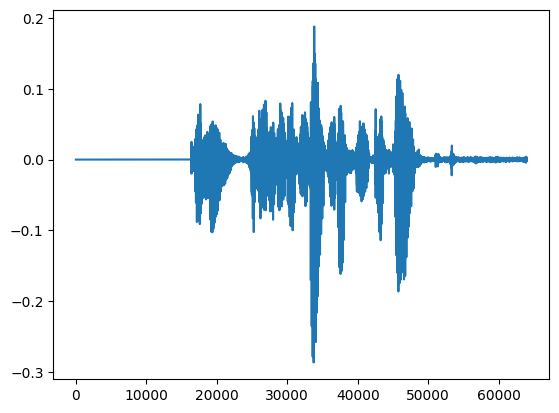

In [9]:
plt.plot(data)
plt.show()

If there are any problems at the start or end of the file, like sudden spikes like keyboard or mouse clicks, remove them here and then write the file again.

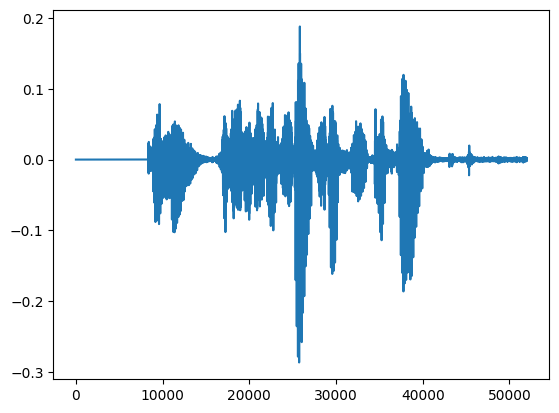

In [10]:
# choose the start_index and end_index manually to trim your soundfile
start_index = 8000
end_index = 60000
data1 = data[start_index:end_index]
plt.plot(data1)
plt.show()

In [11]:
wavfile.write(filename, fs, data1)

# With these basics, let's start the exercise 1.

In [12]:
# Read the audio file and sampling rate

Fs, data = wavfile.read(filename)

# Make sure the sampling rate is 16kHz. Resample if not 16 kHz
Fs_target=16000


if not (Fs == Fs_target):
    data = sig.resample_poly(data,Fs_target,Fs)
    Fs = Fs_target

## Windowing

Write a windowing function which takes the data, window length (frame length, in samples), hop size (in samples), and the type of window function as input and results in an output matrix of dimension $n\times m$, where $n$ corresponds to the frame length and $m$ corresponds to the number of frames. The first frame starts at the beginning of the data.

We will use a frame length of 25ms, with 50\% overlap. The basic window types should be rectangular, Hann, Hamming, Cosine (square root of Hann) window types.

In the windowing function, to implement framing itself, first compute the number of frames for the signal under consideration using this formula:

\begin{equation}
\text{number of frames} = 1 + floor \{\frac{(n-k)}{o}\},
\end{equation}

where $n=\text{data length}$ in samples, $k=\text{frame length}$ in samples, and $o=\text{overlap}$ in samples.

Following this, segment the data with right frame size and overlap and remember to apply the chosen window function to the generated signal frames. Note, if the end sample of the frame segment is larger than the data length, zero-pad the data (with the remainder) to achieve constant frame length.


## Useful functions (all from numpy library)


ones, hanning, hamming, sqrt, zeros, floor

In [13]:
# Split the data sequence into windows. Implement the windowing (below cell)

frame_length_ms = 25 # in miliseconds
hop_length_ms = 12.5 # in miliseconds

frame_length = int(np.around((frame_length_ms/1000)*Fs))# 25ms in samples
hop_size = int(np.around((hop_length_ms/1000)*Fs))# 12.5 ms (25/2 ms) in samples (50% overlap)
window_types = ('rect','hann','cosine','hamming')

259


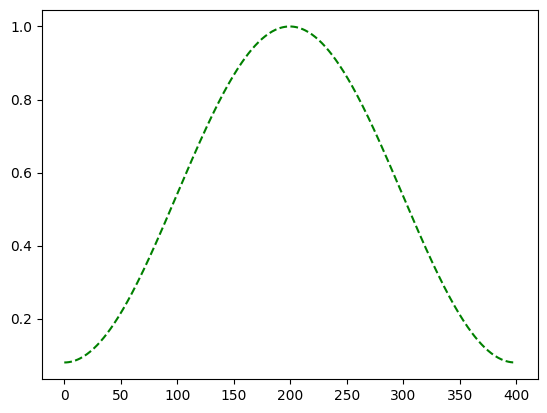

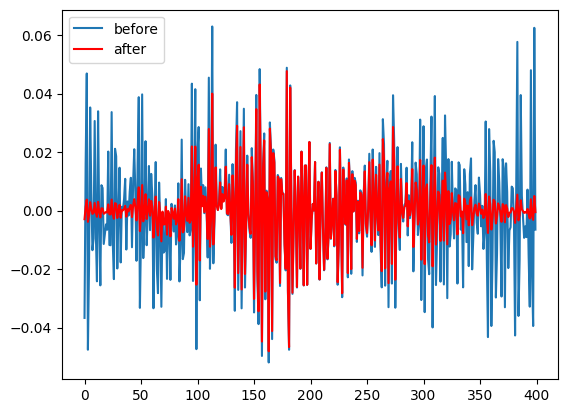

In [14]:
number_of_frames = 1 + int(np.floor((len(data)-frame_length)/hop_size))
print(number_of_frames)
window = np.hamming(frame_length)
plt.figure()
plt.plot(window, color='green', linestyle='--', label='window')

i = 120
frame = np.zeros(frame_length) # Initialize frame as zeroes
   
# Implement the rest here! 
if i*hop_size+frame_length > len(data):
    frame = np.pad(data[i*hop_size:], (0, i*hop_size+frame_length-len(data)), 'constant', constant_values=0)
else:
    frame = data[i*hop_size:i*hop_size+frame_length]
    
plt.figure()
plt.plot(frame, label='before')
plt.plot(frame*window, color='red', label='after')
plt.legend()

In [15]:
## Note: This will be used in the future exercises as well.

def windowing(data, frame_length, hop_size, windowing_function):
    data = np.array(data)
    number_of_frames = 1 + int(np.floor((len(data)-frame_length)/hop_size))#Implement this  #Calculate the number of frames using the above-mentioned formula 
    frame_matrix = np.zeros((frame_length,number_of_frames))

    if windowing_function == 'rect':
        window = np.ones(frame_length) # Implement this
    elif windowing_function == 'hann':
        window = np.hanning(frame_length) # Implement this
    elif windowing_function == 'cosine':
        window = np.cos(np.pi*np.linspace(0.5, frame_length-0.5,num=frame_length)/frame_length)
        #window = np.sin(np.pi / frame_length * (np.arange(0, frame_length) + .5)) # Implement this
    elif windowing_function == 'hamming':
        window = np.hamming(frame_length) # Implement this
    else:
        os.error('Windowing function not supported')
        
    ## Copy each frame segment from data to the corresponding column of frame_matrix.
    ## If the end sample of the frame segment is larger than data length,
    ## zero-pad the remainder to achieve constant frame length.
    ## Remember to apply the chosen windowing function to the frame!
    
    for i in range(number_of_frames):
        frame = np.zeros(frame_length) # Initialize frame as zeroes
   
        # Implement the rest here! 
        if i*hop_size+frame_length > len(data):
            frame = np.pad(data[i*hop_size:], (0, i*hop_size+frame_length-len(data)), 'constant', constant_values=0)
        else:
            frame = data[i*hop_size:i*hop_size+frame_length]
        
        frame = frame*window
        frame_matrix[:,i] = frame   # Copy frame to frame_matrix
    return frame_matrix

### WINDOWING: Based on the input parameters, generate a n x m matrix of windowed frames, with 'n' corresponding to the frame_length (in samples) and 'm' corresponding to the number of frames. 

In [16]:
frame_matrix = windowing(data, frame_length, hop_size, window_types[3])# Windowing

In [17]:
print(frame_matrix.shape)

(400, 259)


## How many frames are there and what is the frame length in samples? [write your answer]

Number of frames= 259

Frame length in samples= 400

# Plotting: speech signal, voiced frame and magnitude spectrum

Visualization and plotting is an important step in not only evalution of methods but also in debugging and finding out problems with the methods. In this section, we will introduce some of the most common plotting and visualization schemes used in speech processing.

In the first figure (Figure 1), we shall plot the original speech signal (Subplot 1), a voiced frame in the time domain (Subplot 2), and the same voiced frame in the frequency domain (Subplot 3). It is important to make note of the plot axes. Divide the figure into 3 subplots, vertically. In the top-most subplot, plot the time domain original signal; the x-axis should be in seconds. In the middle subplot, plot the time domain signal of a voiced frame of your choice. Make sure that the x-axis is in milli-seconds. In the last subplot, plot the first half of the magnitude spectrum of the same voiced frame (i.e., from 0 Hz to Nyquist frequency); represent x-axis as Hz, and y-axis as decibels.

In the second part of this section (Figure 2), we will compute and plot the signal spectrogram. The x-axis should represent time (eitehr in frame numbers or in sec) and the y-axis should represent frequency.

For all the plots, label the axes and titles with appropriate strings.

## Useful functions (matplotlib)

figure, subplot, plot, title, xlabel, ylabel, autoscale, imshow, yticks

**For taking the Fourier transform, we recommend to use np.fft.rfft by n=1024 (n is the number of points to sample from input data to compute the transformation)**

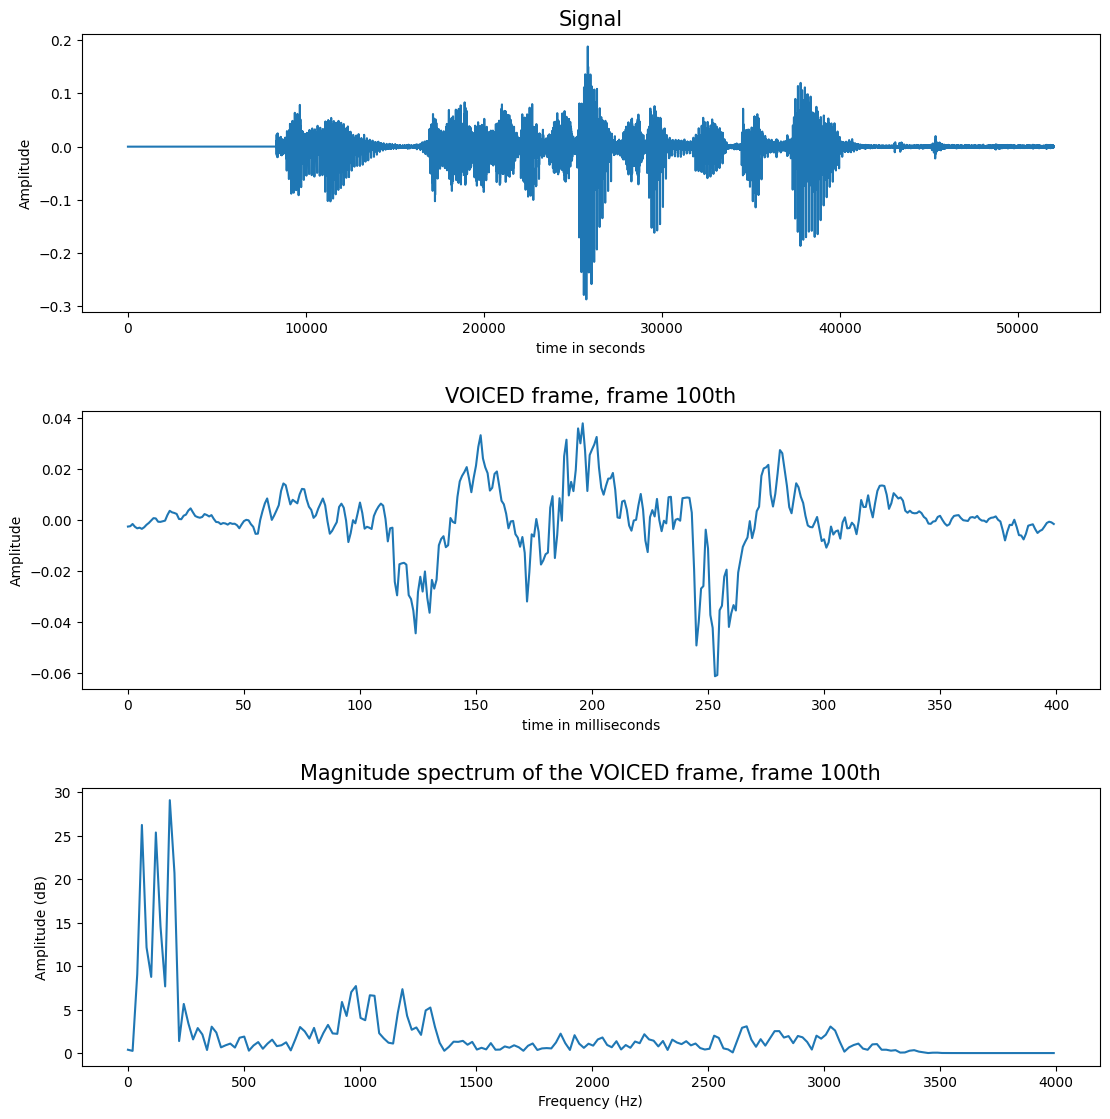

In [24]:
import scipy
# Figure 1: Create a new figure with three subplots.
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
# fig.tight_layout()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
fig.tight_layout(pad=5)

plt.figure(1)
## Plot the whole signal into subplot 1. Denote x-axis as time in seconds and y-axis as Amplitude.
### Set appropriate strings to title, xlabel and ylabel
plt.subplot(3,1,1)
# Implement this
plt.title('Signal',fontsize=15)
plt.xlabel('time in seconds',fontsize=10)
plt.ylabel('Amplitude',fontsize=10)
plt.plot(data)
    
## Plot a VOICED frame from frame_matrix into subplot 2. Denote x-axis as milliseconds and y-axis as Amplitude.
### Set appropriate strings to title, xlabel and ylabel
plt.subplot(3,1,2)
# Implement this
plt.title('VOICED frame, frame 100th',fontsize=15)
plt.xlabel('time in milliseconds',fontsize=10)
plt.ylabel('Amplitude',fontsize=10)
plt.plot(frame_matrix[:,100])

## Plot the magnitude spectrum of the same frame as in subplot 2. into subplot 3. Denote x-axis as Hz, and y-axis as decibels.
### Set appropriate strings to title, xlabel and ylabel
plt.subplot(3,1,3)
# Implement this
frame = frame_matrix[:,100]
magnitude = np.fft.fft(frame/np.max(np.abs(frame)))
frequency = np.linspace(0, Fs/2, num=len(magnitude))
plt.title('Magnitude spectrum of the VOICED frame, frame 100th',fontsize=15)
plt.xlabel('Frequency (Hz)',fontsize=10)
plt.ylabel('Amplitude (dB)',fontsize=10)
plt.plot(frequency[:int(len(frequency)/2)], np.abs(magnitude[:int(len(frequency)/2)]))
plt.show()

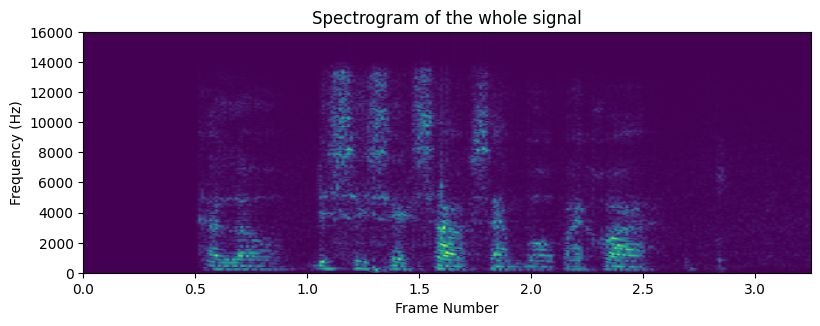

In [19]:
## Figure 2: Compute and plot the spectrogram of the whole signal into a new figure.
## Denote x-axis as frame number and y-axis as Frequency in Hz
## Set appropriate strings to title, xlabel and ylabel

#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
#fig.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
fig.tight_layout()
plt.figure(1)
number_of_frames = 1 + int(np.floor((len(data)-frame_length)/hop_size))
spectrogram = np.zeros_like(frame_matrix)

for i in range(number_of_frames):
    frame = frame_matrix[:,i]
    magnitude = np.fft.fft(frame)
    spectrogram[:,i] = magnitude
    
frequency = np.linspace(0, Fs/2, num=len(magnitude))


plt.title('Spectrogram of the whole signal')
plt.xlabel('Frame Number')
plt.ylabel('Frequency (Hz)')
plt.imshow(20*np.log10(0.2+np.abs(spectrogram[range(int((frame_length+1)/2)),:])),
           aspect='auto', origin='lower', cmap='viridis', extent=[0, len(data)/Fs, 0, Fs])
plt.show()

## Answer these quetions:

1. Change the frame_length_ms. Then, explain how shape of the frame_matrix changes (frame matrix shape = frame length in samples X number of frames). Why? Also, explain how each plot changes? Why?

2. Change the hop_length_ms. Then, explain how shape of the frame_matrix changes (frame matrix shape = frame length in samples X number of frames). Why? Also, explain how each plot changes? Why?

3. Change the value of n (number of fft points) in np.fft.rfft function and explain how this parameter affect the magnitude spectrum and spectogram? Why?

4. Record a new sound sample with Fs=32000 and explain how each plot changes? Why? (Note that you don't need to submit the plots and sound recorded at this sampling rate. Only do one new round of experiment with Fs=32000 and answer this question.)